# 그래프와 시각화 3편

__참고:__ 웨스 맥키니의 [<파이썬 라이브러리를 활용한 데이터 분석>](https://github.com/wesm/pydata-book)의 
9장 2절에 사용된 소스코드를 활용한다.

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## pandas로 그래프 그리기

판다스의 시리즈(Series)와 데이터프레임(Dataframe) 객체 모두 `plot()` 메서드를 지원한다. 
실제로는 `matplotlib.pyplot.plot()`을 이용하기에 `xticks`, `xlim` 등 옵션 사용방식 또한 거의 동일하다.
자세한 옵션과 사용법은 공식문서를 참고한다. 

- `pandas.Seris.plot()`: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html
- `pandas.DataFrame.plot()`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### 시리즈와 선그래프

시리즈는 하나의 선그래프를 그릴 수 있으며, 항목ㅣ y축 좌표로, 인덱스가 x축 좌표로 사용된다.

In [2]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [3]:
s

0    -0.204708
10    0.274236
20   -0.245203
30   -0.800933
40    1.164847
50    2.558253
60    2.651161
70    2.932907
80    3.701930
90    4.948364
dtype: float64

<AxesSubplot:>

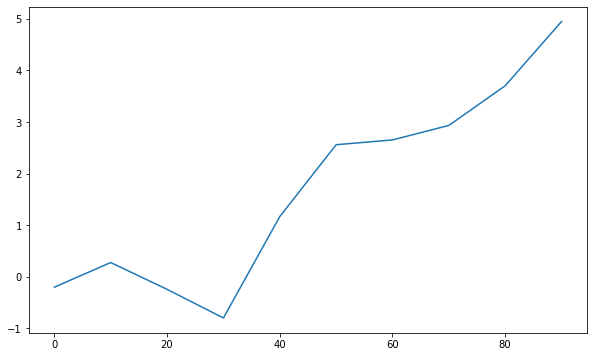

In [4]:
s.plot()

### 데이터프레임과 선그래프

데이터프레임은 특성 수만큼의  선그래프를 그릴 수 있다.
y축 좌표는 특성별 항목이며, x축 좌표는 기본적으로 인덱스가 사용된다.
또한 특성 이름이 범례로 지정된다.

In [5]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

df

,A,B,C,D
0,1.007189,-1.296221,0.274992,0.228913
10,2.360106,-0.409792,-1.726646,-0.142930
20,4.029132,-0.848362,-2.266387,0.334055
30,7.278075,-1.869589,-2.843474,0.458177
40,7.580689,-1.345817,-2.842534,1.801986
50,6.867145,-2.176970,-5.212766,-0.058774
60,6.006388,-1.616825,-6.478700,0.061053
70,4.942875,-1.283942,-8.838119,-0.138490
80,3.400880,-2.254678,-10.145149,0.147860
90,3.778864,-3.008565,-9.813864,1.497602


<AxesSubplot:>

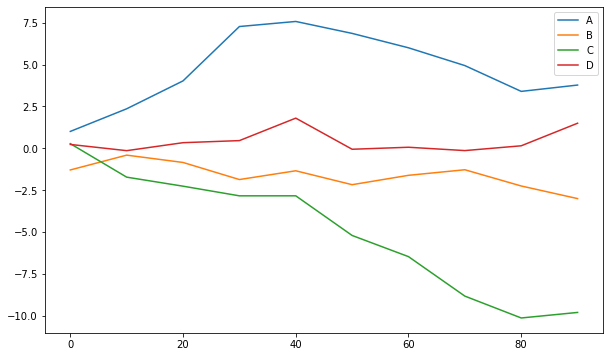

In [6]:
df.plot()

`subplots=True` 키워드 인자를 사용하면 각각의 그래프를 1차원 어레이 모양의 독립된 서브플롯에서 그린다.

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

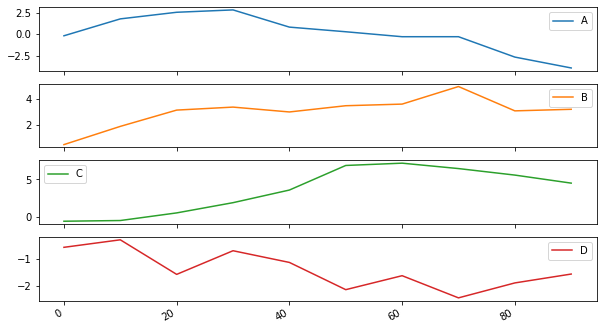

In [7]:
np.random.seed(12345)
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot(subplots=True)

### 시리즈와 막대그래프

- 수직 막대그래프: `pandas.Series.plot.bar()`
- 수평 막대그래프: `pandas.Series.plot.barh()`

아래 코드는 시리즈를 이용한 수직/수평 막대그래프를 그리는 기본적인 방법을 보여준다.
수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 해당한다.

In [8]:
np.random.seed(12345)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [9]:
data

a    0.929616
b    0.316376
c    0.183919
d    0.204560
e    0.567725
f    0.595545
g    0.964515
h    0.653177
i    0.748907
j    0.653570
k    0.747715
l    0.961307
m    0.008388
n    0.106444
o    0.298704
p    0.656411
dtype: float64

__참고:__ 서브플롯을 지정하려면 `ax=서브플롯` 옵션을 지정하면 되며, 이는 시리즈와 데이터프레임의
모든 그래프 함수에 사용된다.
아래 데이터는 (2,1) 모양의 `Figure` 객체에 포함된 두 개의 서브플롯에 각각 수직/수평 막대그래프를 삽입한다.

<AxesSubplot:>

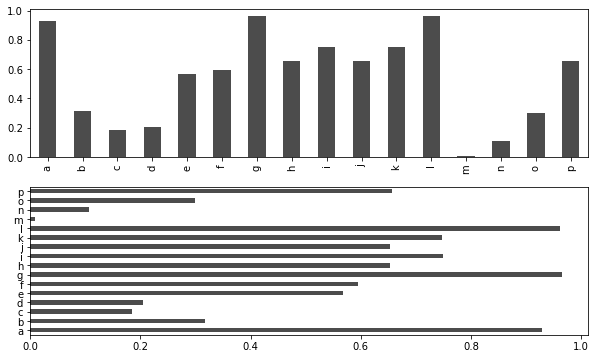

In [10]:
fig, axes = plt.subplots(2, 1)

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

#### plot() 메서드의 `kind=bar`와 `kind=barh` 옵션

`kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수와 동일하다.

<AxesSubplot:>

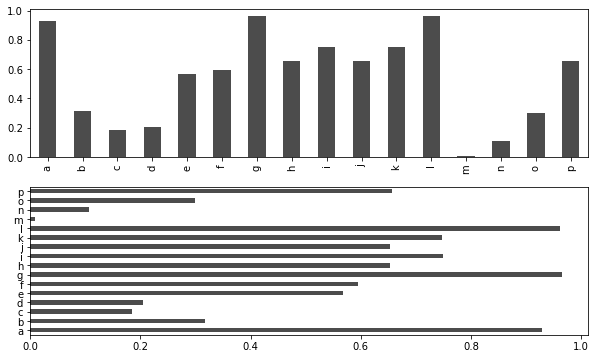

In [11]:
fig, axes = plt.subplots(2, 1)

data.plot(ax=axes[0], kind='bar', color='k', alpha=0.7)
data.plot(ax=axes[1], kind='barh', color='k', alpha=0.7)

### 데이터프레임과 막대그래프

- 수직 막대그래프: `pandas.DataFrame.plot.bar()`
- 수평 막대그래프: `pandas.DataFrame.plot.barh()`

아래 코드는 데이터프레임을 이용한 수직/수평 막대그래프를 그리는 기본적인 방법을 보여준다.
수평 막대그래프의 x축/y축 눈금은 수직 막대그래프의 y축/x축 눈금에 해당한다.

- 범례 제목: 컬럼 인덱스의 이름이 주어진 경우 사용된다. 아래 코드에서는 Genus이다. 
- 행별 막대그래프를 하나로 묶어서 보여준다.

In [12]:
np.random.seed(12348)

df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


<AxesSubplot:>

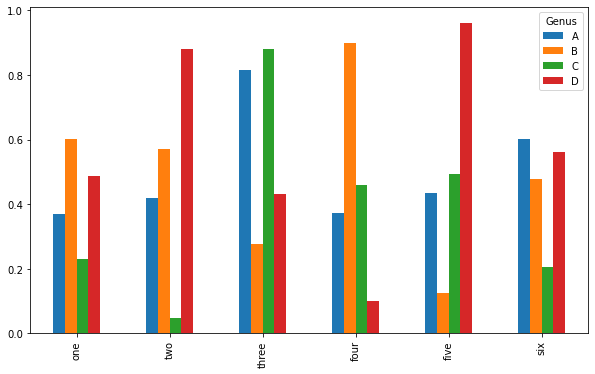

In [13]:
df.plot.bar()

<AxesSubplot:>

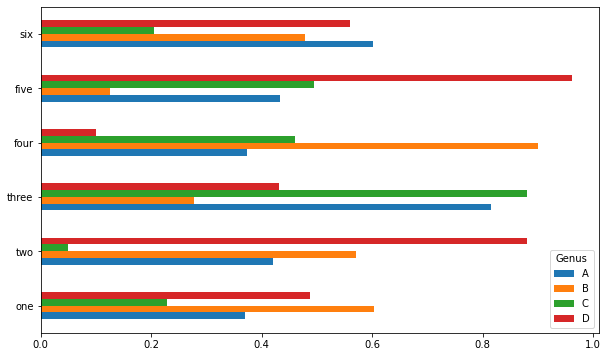

In [14]:
df.plot.barh()

#### 누적막대그래프

`stacked=True` 옵션을 사용하면 각 행의 값들이 하나의 막대에 누적되어 출력된다.

<AxesSubplot:>

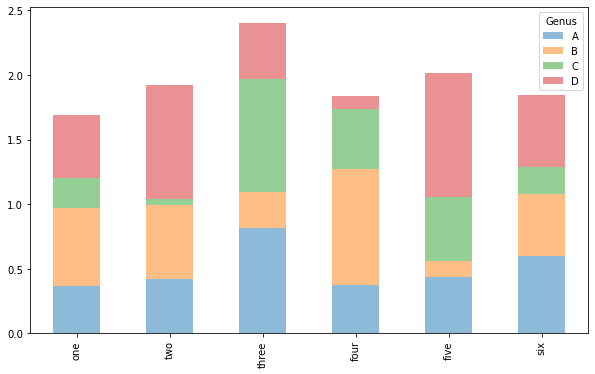

In [15]:
df.plot.bar(stacked=True, alpha=0.5)

<AxesSubplot:>

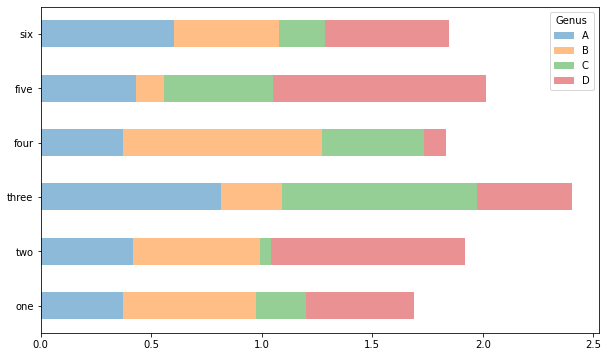

In [16]:
df.plot.barh(stacked=True, alpha=0.5)

#### plot() 메서드의 `kind=bar`와 `kind=barh` 옵션

`kind=bar`/`kind=barh` 옵션이 각각 수직/수평 막대그래프를 그리는 함수와 동일하다.

<AxesSubplot:>

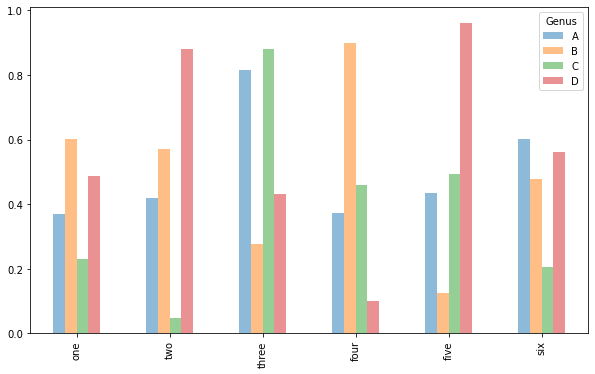

In [17]:
df.plot(kind='bar', alpha=0.5)

<AxesSubplot:>

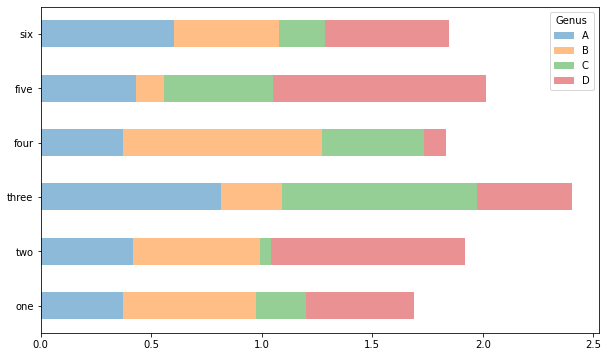

In [18]:
df.plot(kind='barh', stacked=True, alpha=0.5)

### 예제: 서비스 팁(tip) 데이터

서비스 팁 데이터는 요일별 파티 수, 총 수입, 시간대, 팁 수입 등에 대한 정보를 담고 있다.

__참고:__ 서비스 팁 데이터를 아래처럼 불러올 수도 있다.

```python
import seaborn as sns
tips = sns.load_dataset('tips').drop('sex', axis=1)
```

In [19]:
tips_path = 'https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/examples/tips.csv'

In [20]:
tips = pd.read_csv(tips_path)

tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


열별 특성은 다음과 같다.

- `total_bill`: 총 수입
- `tip`: 서비스 팁
- `smoker`: 흡연 여부 
- `day`: 요일
- `time`: 시간대(점심/저녁)
- `size`: 파티 규모(참여인원 수)

범주형 데이터에 사용된 값들은 다음과 같다.

* 흡연 여부

In [21]:
tips['smoker'].unique()

array(['No', 'Yes'], dtype=object)

* 요일

In [22]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

* 시간대

In [23]:
tips['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

`'size'` 특성은 해당 파티 규모, 즉 파티 참여인원 수를 가리키며 최소 1명 최대 6명이 참여했다.

In [24]:
tips['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

#### 교차 테이블

요일과 파티 규모 사이의 관계를 파악하기 위해 교차표(cross table)를 이용한다.
`pandas.crosstab()` 함수는 지정된 두 특성 사이의 도수분포도를 표로 생성한다.

In [25]:
party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


빈도수가 낮은 1인과 6인 파티는 제외하자.

In [26]:
# 1인과 6인 파티 제외
party_counts = party_counts.loc[:, 2:5]

party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


#### 행별 정규화(Normalization)

행별로 항목의 합이 1이 되도록 값을 정규화한다.
이 과정을 통해 요일별 파티 규모의 비율을 파악할 수 있다.

- `pandas.div()` 함수: 각 항목을 지정된 값으로 나눈다. `axis=0`는 행별로 나눗셈을 실행하도록 지정한다.

In [27]:
# 각 행의 합이 1이 되도록 정규화
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


요일별 파티 규모를 막대그래프로 그리면 다음과 같으며, 
주말일 수록 파티 규모가 커짐을 쉽게 확인할 수 있다.

<AxesSubplot:xlabel='day'>

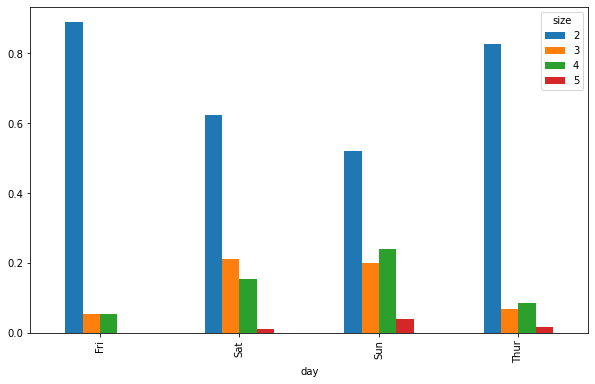

In [28]:
party_pcts.plot.bar()

## seanborn으로 그래프 그리기

seaborn 라이브러리는 matplotlib을 바탕으로 멋진 통계 관련 그래프를 그리는 API(도구)를 제공한다.
활용법 설명을 위해 서비스 팁(tip) 데이터를 계속 활용한다.

In [29]:
import seaborn as sns

요일별로 총 순수수입에서 서비스 팁이 차지하는 비율을 특성으로 추가하자.

- 팁 비율: 총 순수수입 $=$ 총 수입 $-$ 팁

In [30]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


#### `seaborn.barplot()` 함수

요일별 서비스 팁의 비율의 평균값(mean)은 다음과 같다.
막대 끝에 위치한 검정 직선 기본적으로 신뢰도 95%의 신뢰구간을 표시하는 __오차 막대__(error bar)이다.

__참고:__ 축에 사용될 값들은 열 특성이름을 이용하여 지정한다.

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

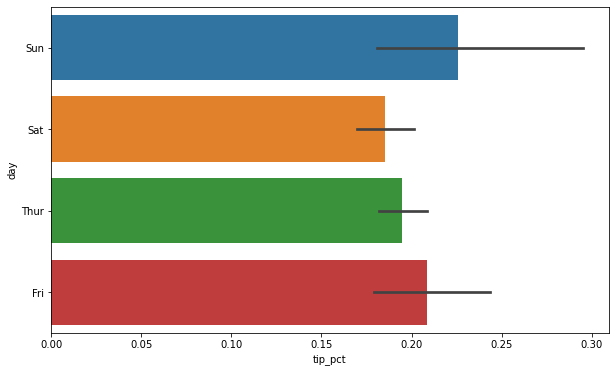

In [31]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

`ci` 옵션을 조절하면 신뢰구간을 표준편차로 바꾸거나 아무 것도 표시하지 않도록 할 수 있다.

- `ci='sd'` 옵션: 신뢰 구간 대신에 표준 편차(standard deviation) 표시.
- `ci=None` 옵션: 검정 막대 표시하지 않음.

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

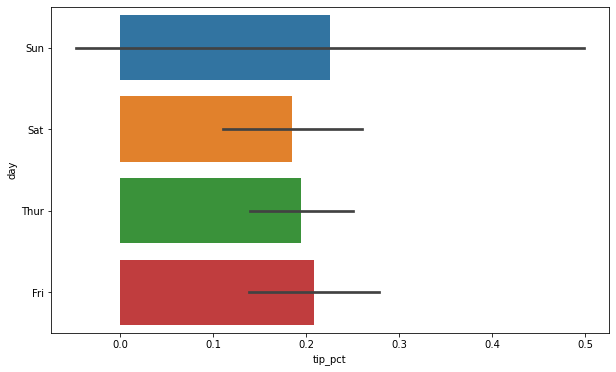

In [32]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', ci='sd')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

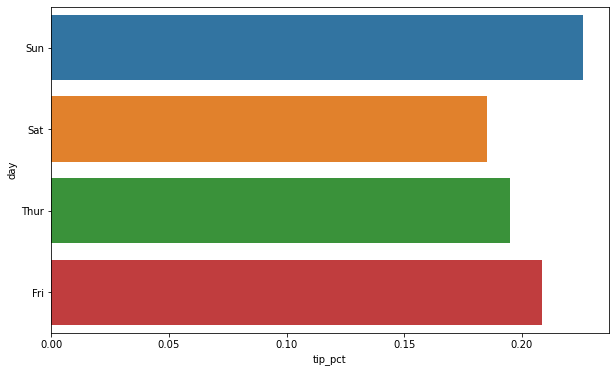

In [33]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', ci=None)

* `hue='time'`: 시간대를 추가 기준으로 사용하면 다음 결과가 보인다.

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

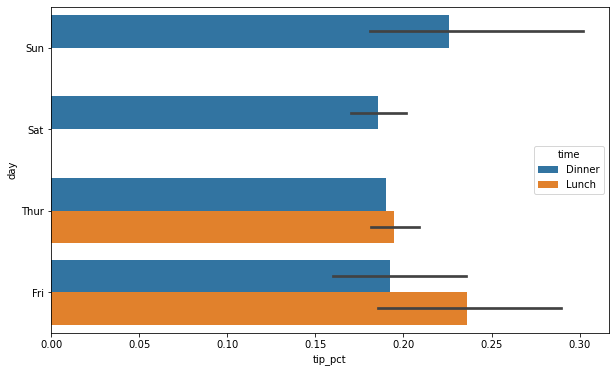

In [34]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

__참고:__ 목요일 저녁 막대에 신뢰구간이 표시되지 않는 이유는 단 한 번의 파티만 있었기 때문이다.

In [35]:
day_thur = tips['day']=='Thur'
time_dinner = tips['time']=='Dinner'

In [36]:
tips[day_thur & time_dinner]

,total_bill,tip,smoker,day,time,size,tip_pct
243,18.78,3.0,No,Thur,Dinner,2,0.190114


### seaborn 기본 설정

`seaborn.set_theme()` 함수를 이용하여 다양한 설정을 지정할 수 있으며 
사용 방식은 다음과 같다.

```python
seaborn.set_theme(context='notebook', 
                  style='darkgrid', 
                  palette='deep', 
                  font='sans-serif', 
                  font_scale=1, 
                  color_codes=True, 
                  rc=None)
```

In [37]:
sns.set_theme(style="darkgrid")

지정된 설정은 모든 그래프에 영향을 준다.

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

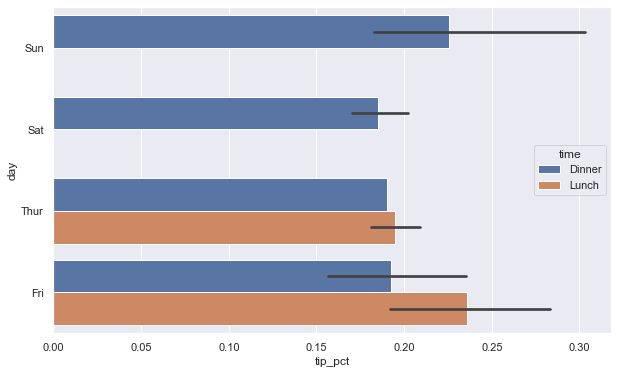

In [38]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### 히스토그램과 밀도그래프

아래 pandas의 `plot()` 함수를 이용하여 히스토그램을 그리는 것을 보여준다.
사용되는 데이트는 요일별 팁의 비율이며 최고 2.5% 정도에 다다른다.

In [39]:
tips.tip_pct.max()

2.452380952380953

<AxesSubplot:ylabel='Frequency'>

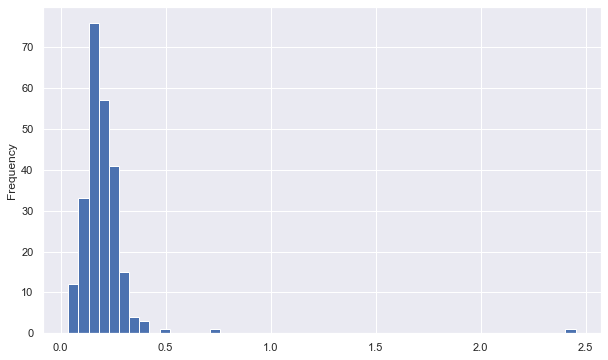

In [40]:
tips['tip_pct'].plot.hist(bins=50)

`pandas.plot.density()` 함수는 히스토그램에 대한 추정 연속확률밀도 함수의 그래프를 그린다.

<AxesSubplot:ylabel='Density'>

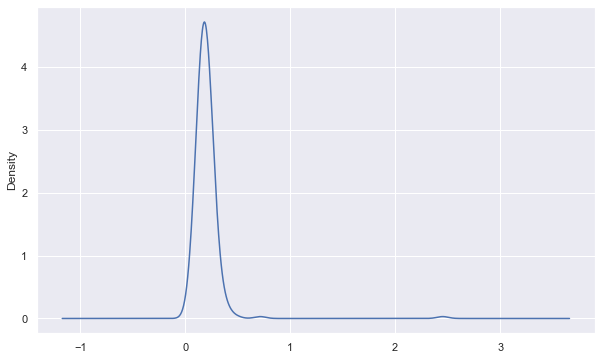

In [41]:
tips['tip_pct'].plot.density()

seaborn 라이브러리를 이용하여 히스토그램과 밀도그래프를 함께 그릴 수도 있다.
이를 위해 `seaborn.histplot()` 또는 `seaborn.displot()` 함수를 `kde=True` (커널 밀도 추정) 옵션과 함께 사용한다.

__주의사항:__ 책에서 사용한 아래 함수는 더 이상 지원되지 않는다.

```python
seaborn.distplot(values, bins=100, color='k')
```

#### `seaborn.histplot()` 함수

<AxesSubplot:ylabel='Count'>

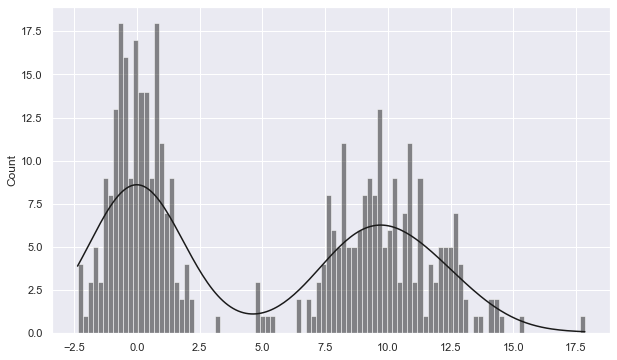

In [42]:
np.random.seed(12345)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color='k', kde=True)

#### `seaborn.displot()` 함수

`seaborn.displot()` 사용할 경우 사이즈와 가로세로의 기본 비율이 다르다.

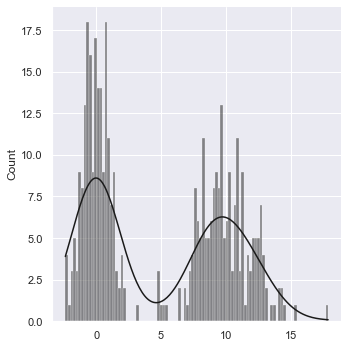

In [43]:
np.random.seed(12345)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.displot(values, bins=100, color='k', kde=True)

하지만 `height`와 `aspect` 옵션을 이용하면 적절한 크기와 비율로 맞출 수 있다.

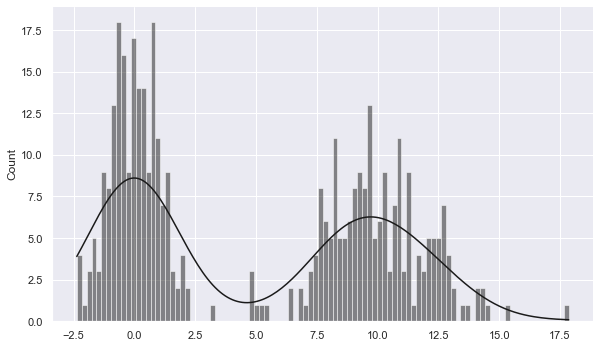

In [44]:
np.random.seed(12345)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.displot(values, bins=100, color='k', kde=True, height=5, aspect=1.7)

#### 예제: 서비스 팁 비율의 히스토그램과 밀도 그래프

In [45]:
data = tips['tip_pct']

<AxesSubplot:xlabel='tip_pct', ylabel='Count'>

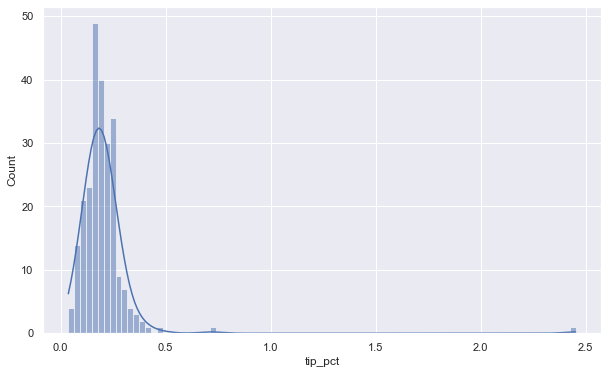

In [46]:
sns.histplot(data, kde=True)

### 산점도

산점도는 두 변수간의 관계를 좌표상의 점으로 표시하여 나타내는 그래프다.
산점도의 활용을 살펴보기 위해 1959년부터 2009년까지 미국의 거시경제지표를 담고 있는 데이터를 사용하며,
`statsmodels` 모듈에서 불러온다.

In [47]:
import statsmodels.api as sm

macro = sm.datasets.macrodata.load_pandas().data
macro

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


포함된 14개의 경제지표는 다음과 같다.

| 지표 | 설명 |
| :--- | :--- |
| year | 1959년 1분기 - 2009년 3분기 |
| quarter | 1 - 4분기|
| realgdp | 실질 국내총생산 (단위: 억 달러) |
| realcons | 실질 총민간 소비지출 (단위: 억 달러) |
| realinv | 실질 총민간 국내투자 (단위: 억 달러) |
| realgovt | 실질 연방 정부 소비지출 및 국내투자 (단위: 억 달러) |
| realdpi | 실질 가처분 소득 (단위: 억 달러) |
| cpi | 소비자 물가지수 |
| m1 | M1 통화지표 | 
| tbilrate | 3개월 만기 국채 수익률|
| unemp | 실업률 | 
| pop | 인구 |
| infl | 물가상승률 |
| realint | 실질 이자율 |

이중에 네 개의 지표만 이용해서 산점도를 설명한다.

- cpi: 분기별 소비자 물가지수
- m1: M1 통화지수
- tbilrate: 3개월 만기 국채 수익률
- unemp: 실업률

In [48]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


시간의 흐름에 따른 변화량을 살펴보려 한다. 
사용된 데이터의 척도(scale)을 맞추기 위해 로그값을 취한 후 분기별 변화량을 측정한다.

- `np.log()` 함수: 어레이/데이터프레임의 항목별로 적용되는 유니버설 함수
- `diff()` 메서드: 열별로 이전 행의 항목값과의 차이를 계산함. 
    0번 행이거나 결측치가 사용되었을 경우 결측치로 처리됨.
    `axis=1`로 지정하면 열별 차이를 계산함.
- `dropna()` 메서드: 결측치가 포함된 행 삭제.
    `axis=1`로 지정하면 결측치가 포함된 열 삭제.
    
0번 행은 무조건 결측치가 포함되기에 삭제된다.

In [49]:
trans_data = np.log(data).diff().dropna()
trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


#### 산점도와 선형회귀 곡선

`seaborn.regplot()` 함수는 산점도와 두 데이터 사이의 선형 관계를 보여주는 선형회귀 곡선을 동시에 그린다.

__참고:__ 책 378쪽에서 사용하는 아래 방식은 더 이상 지원되지 않는다.

```python
seaborn.regplot('m1', 'unemp', data=trans_data)
```

대신 아래 방식을 사용해야 한다.

```python
seaborn.regplot(x='m1', y='unemp', data=trans_data)
```

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

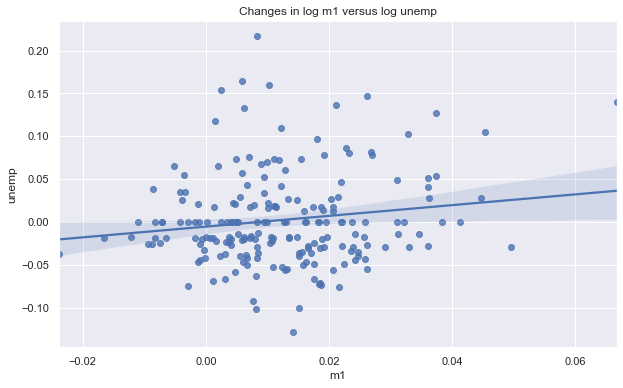

In [50]:
sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

사실 `m1` 데이터와 `unemp` 데이터 사이의 선형관계가 많이 있어보이지는 않는다. 
실제로 두 특성 사이의 피어슨 상관계수는 0.15 정도로 매우 작다.

In [51]:
correlation = trans_data.corr()
correlation

,cpi,m1,tbilrate,unemp
cpi,1.000000,-0.050535,0.329456,0.019750
m1,-0.050535,1.000000,-0.360278,0.150729
tbilrate,0.329456,-0.360278,1.000000,-0.371491
unemp,0.019750,0.150729,-0.371491,1.000000


`seaborn.heatmap()` 함수를 이용하여 선형관계를 색으로 표현할 수 있다.

<AxesSubplot:>

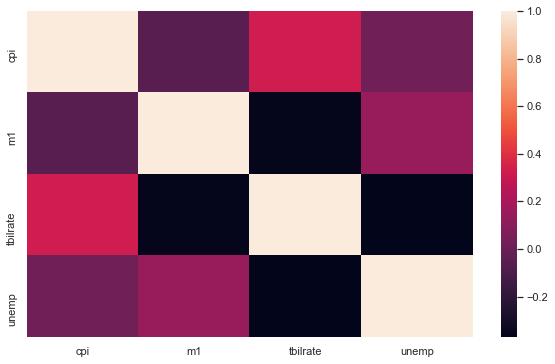

In [52]:
sns.heatmap(correlation)

__참고:__ 선형회귀 직선을 보이지 않으려면 `fit_reg=False` 옵션을 사용한다.

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

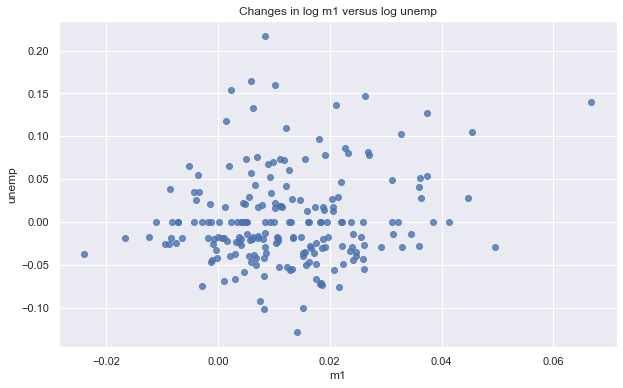

In [53]:
sns.regplot(x='m1', y='unemp', data=trans_data, fit_reg=False)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

`seaborn.regplot()` 함수의 보다 다양한 기능은 [공식문서](https://seaborn.pydata.org/generated/seaborn.regplot.html)를 참고한다.

#### 산점도 행렬

상관계수와 히트맵의 경우처럼 가능한 모든 산점도를 한꺼번에 그릴 수 있다.
예를 들어 4개의 열 특성이 주어지면 4x4 모양의 격자를 산점도로 채운 그림이 그려진다.
대각선 상에는 해당 데이터의 도수분포도를 보여주는 히스토그램이 기본으로 입력된다.

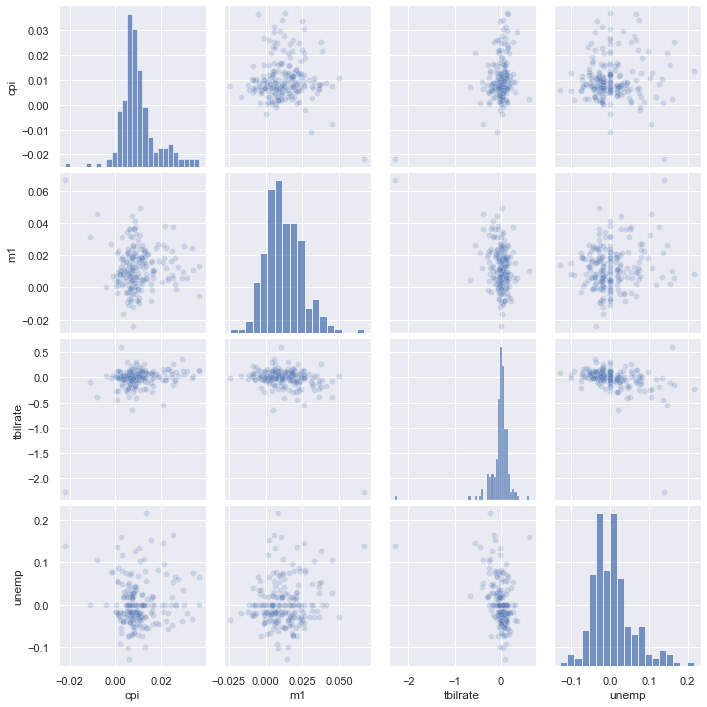

In [54]:
sns.pairplot(trans_data, plot_kws={'alpha': 0.2})

`diag_kind=kde` 옵션을 사용하면 대각선 상에 히스토그램 대신 밀도그래프가 삽입된다.

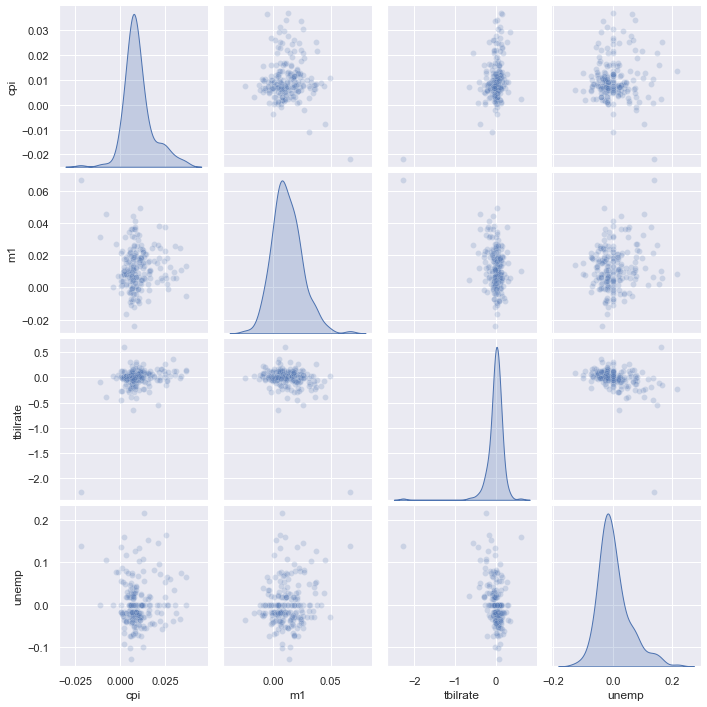

In [55]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 패싯 그리드(Facet Grids)과 범주형 데이터

패싯그리드 클래스(`seaborn.FacetGrid`)는 여러 개의 `pyplot.subplots()` 함수와 비슷하게 작동한다.
다만, 지정된 옵션에 따라 격자 분할을 적절하게 지정한다. 

__참고:__ 책 380쪽에서 사용하는 `seaborn.factorplot()` 함수 이름이 `seaborn.catplot()` 으로 변경되었다.

아래 코드는 요일별 팁 비율을 막대그래프로 보여준다. 단, 1% 미만의 팁 비율만 다룬다.
또한 흡연 여부에 따라 두 개의 막대그래프를 열별로 그린다.

- `col='smoker'`: 흡연 여부에 따른 구분
- `hue='time'`: 시간대별로 각각 다른 두 개의 막대그래프를 요일마다 그림.

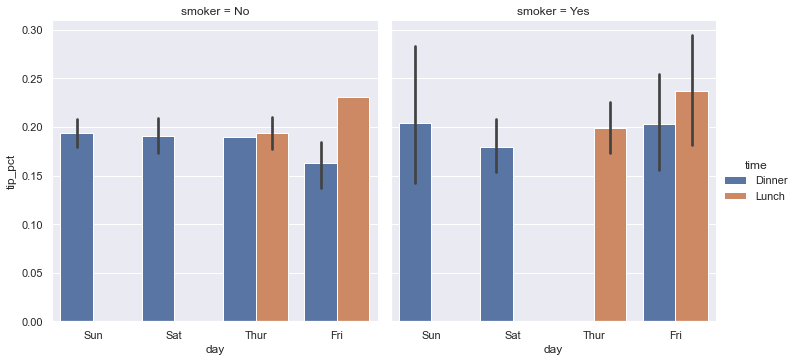

In [56]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

열뿐만 아니라 행별로 구분된 그래프를 그리려면 `row` 옵션 인자를 활용한다.
예를 들어, 앞서 `hue='time'` 옵션을 아래와 같이 바꾸면 두 개의 행에 걸쳐 서로 다른 시간대별 막대그래프를 그리며 결국 2x2 모양의 격자에 총 네 개의 막대그래프가 그려진다.

- `row='time'`: 점심과 저녁 시간대를 행으로 구분한다.

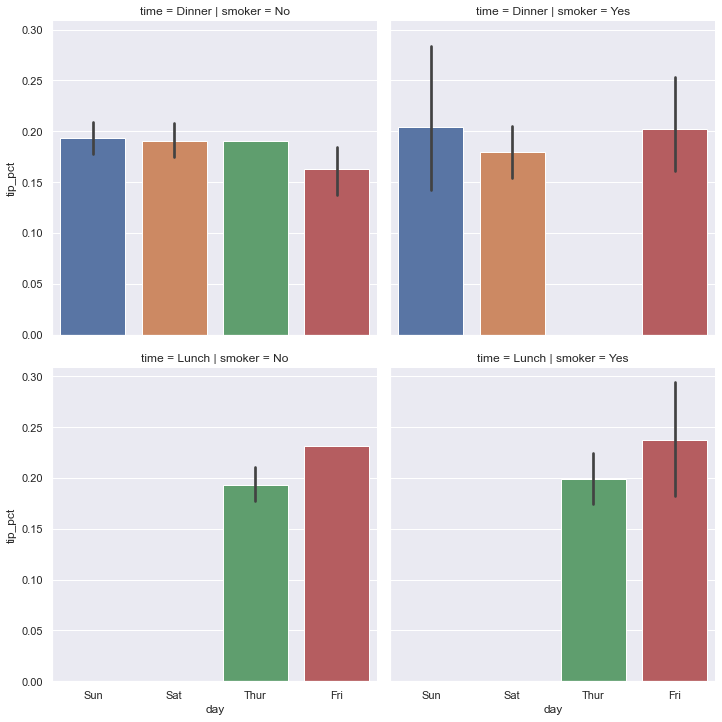

In [57]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

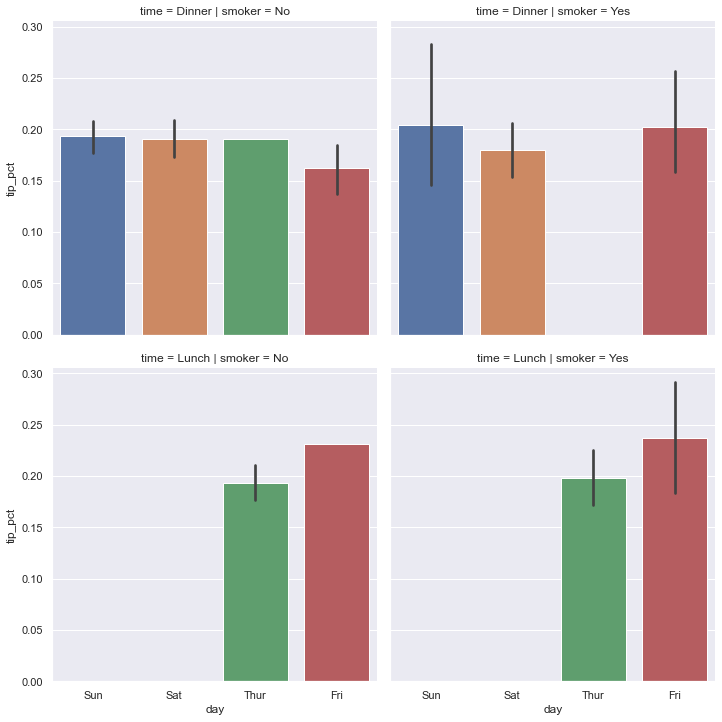

In [58]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

물론 아래와 같이 `col` 옵션을 지정하지 않으면 행별로 하나의 막대그래프만 그릴 수도 있다.

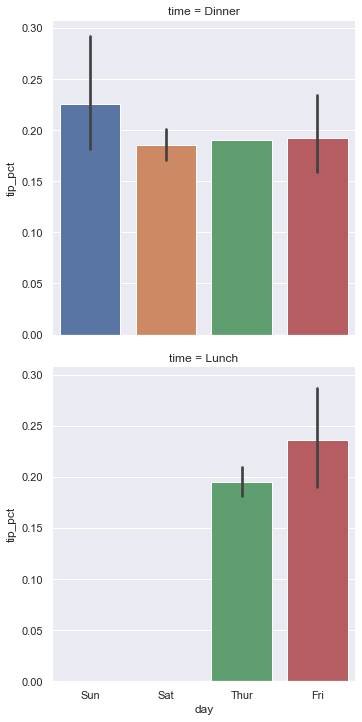

In [59]:
sns.catplot(x='day', y='tip_pct', row='time', kind='bar', data=tips)

`kind` 옵션에 따라 다양한 그래프를 그린다. 
보다 자세한 내용은 [seaborn.catplot 공식 문서](https://seaborn.pydata.org/generated/seaborn.catplot.html)를
참고한다.

아래 코드는 데이터의 중간값, 사분위수, 이상치 등을 보여주는 상자그림(box plot)를 그린다.

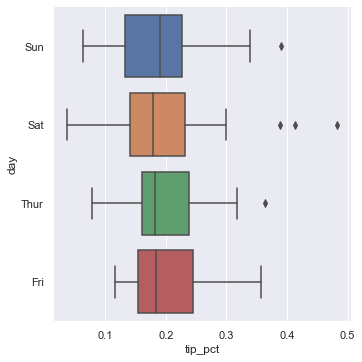

In [60]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

## 기타 시각화 도구 안내

matplotlib과 seaborn 등은 출판용도의 정적 그래프를 생성한다. 
반면에 웹에서 동적 대화형으로 작동하는 그래프를 파이썬으로 그리려면 
[Bokeh](https://docs.bokeh.org/en/latest/) 또는
[Plotly](https://github.com/plotly/plotly.py) 등을 이용할 수 있다.